In [407]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline

In [408]:
# Reading the input data
data=pd.read_csv('day.csv',encoding='utf-8') ## importing the dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [409]:
data.shape # Looking at the dimensions of dataset

(730, 16)

In [410]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [411]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [412]:
# Checking for nulls in the dataset
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [413]:
### high level statistics of data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [414]:
# mapping the required values in the dataset
data['season'] =data['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
data['holiday'] = data['holiday'].map({0:'Nholiday',1:'Holiday'})
data['workingday'] = data['workingday'].map({0:'Off',1:'Workday'})
data['weathersit'] = data['weathersit'].map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' })
data['yr'] = data['yr'].map({0:'2018',1:'2019'})


In [415]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,1,Nholiday,6,Off,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,1,Nholiday,0,Off,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,1,Nholiday,1,Workday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,1,Nholiday,2,Workday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,1,Nholiday,3,Workday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [416]:
# converting date string to date time format
data['dteday'] = pd.to_datetime(data['dteday'])

In [417]:
# since we have information for month and yesr, the only time interval we didn't extracted is day.we extract it here
data['Day'] = data['dteday'].dt.day

In [418]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day
0,1,2018-01-01,Spring,2018,1,Nholiday,6,Off,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-02-01,Spring,2018,1,Nholiday,0,Off,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-03-01,Spring,2018,1,Nholiday,1,Workday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,4,2018-04-01,Spring,2018,1,Nholiday,2,Workday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,5,2018-05-01,Spring,2018,1,Nholiday,3,Workday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


### Univariate analysis for each categorical variable

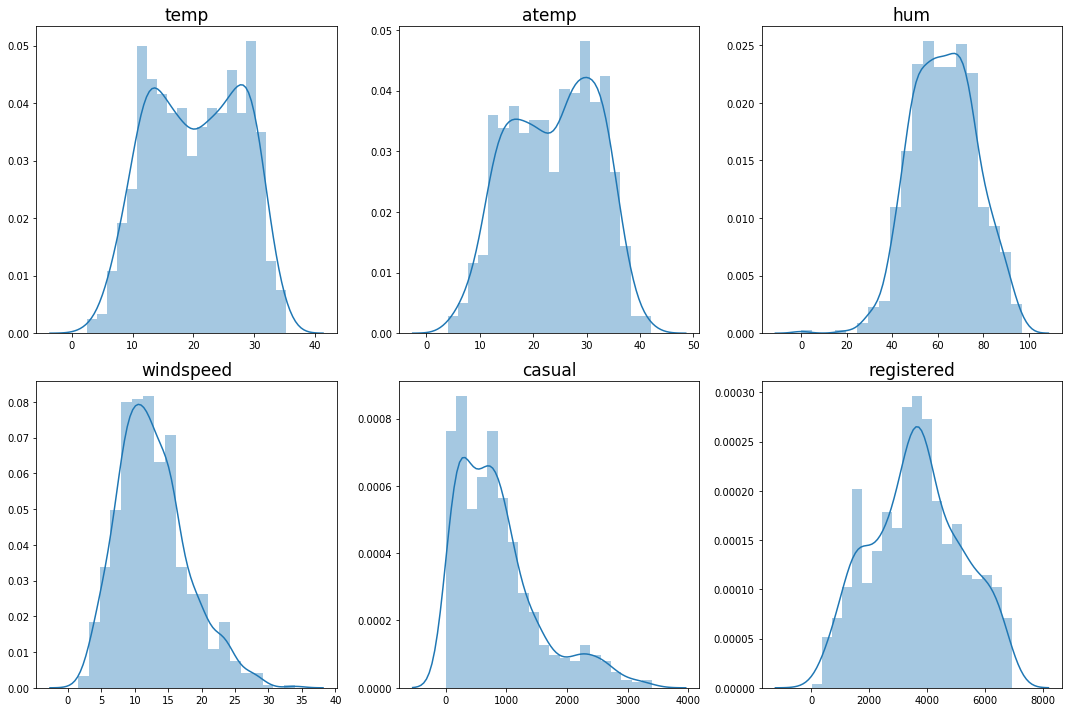

In [419]:
# Plotting histogram of numerical variables to visualize the distribution
columns=['temp','atemp','hum','windspeed','casual','registered']
fig,axes=plt.subplots(2,3,figsize=(20,10))
count=0
for i in range(2):
    for j in range(3):
        s=columns[count+j]
        sns.distplot(data[s].values,ax=axes[i][j],bins=20)
        axes[i][j].set_title(s,fontsize=17)
        fig=plt.gcf()
        fig.set_size_inches(15,10)
        plt.tight_layout()
    count=count+j+1

### It is observed that distribution temp and atemp looks similar

In [420]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches 
    i = 0
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # placing a label for each bar
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        #setting number of points between bar and label
        space = 5
        # setting Vertical alignment for positive values
        va = 'bottom'

        # placing the label below bar if value is negative
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal point
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

### let's visualize by each categorical variable

[Text(0, 0, 'spring'),
 Text(0, 0, 'sumer'),
 Text(0, 0, 'fall'),
 Text(0, 0, 'winter')]

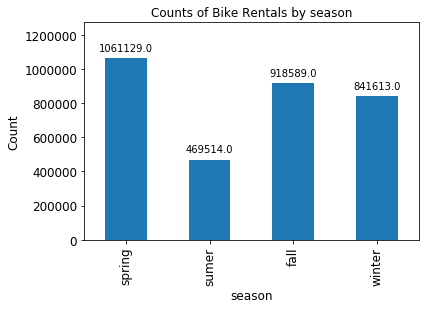

In [421]:
ax = data[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12)
showLabels(ax)
ax.set_xlabel("season", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(['spring','sumer','fall','winter'])

### It is observed that season summer has lowest count because of less usage due to soaring temperatures, spring season is observed with maximum number of rentals comparitively

[Text(0, 0, '1: Clear, Few clouds, Partly cloudy, Partly cloudy'),
 Text(0, 0, '2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'),
 Text(0, 0, '3: \\Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds')]

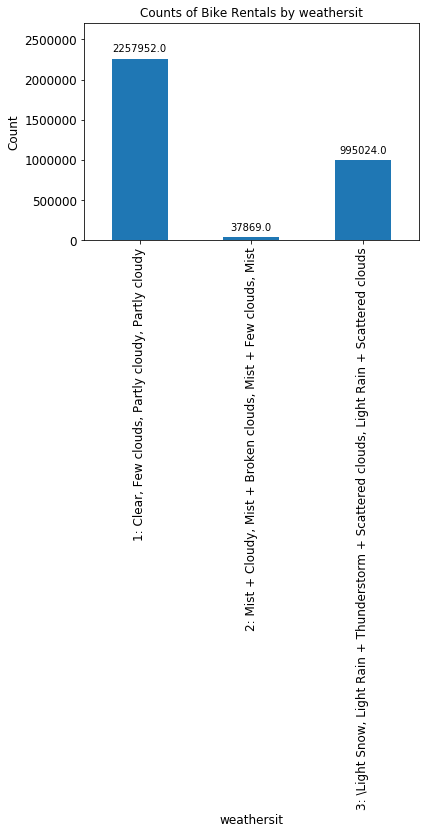

In [422]:
ax = data[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by weathersit", 
                                         stacked=True, fontsize=12)
showLabels(ax)
ax.set_xlabel('weathersit', fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(['1: Clear, Few clouds, Partly cloudy, Partly cloudy','2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist','3: \Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds','4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' ])

### It is observed that weather conditions of clear and parly cloudy conditions affects the rental counts

### It is observed that the factor MIST has least significance in affecting the total count

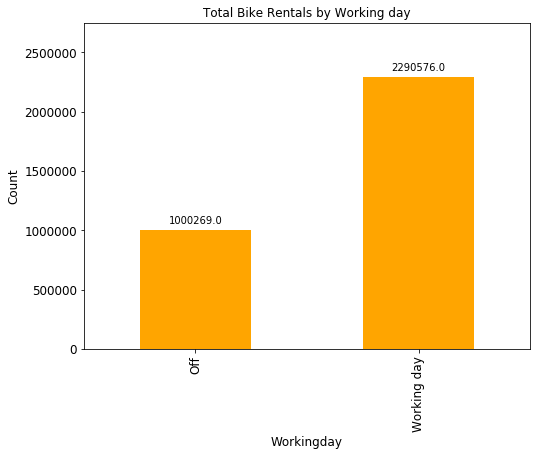

In [423]:
ax = data[['workingday','cnt']].groupby(['workingday']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Working day", 
                                       color='orange', fontsize=12)
showLabels(ax)
ax.set_xlabel("Workingday", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(['Off','Working day'])
plt.show()

### It is observed that Working day has significant number of rentals than non-working day

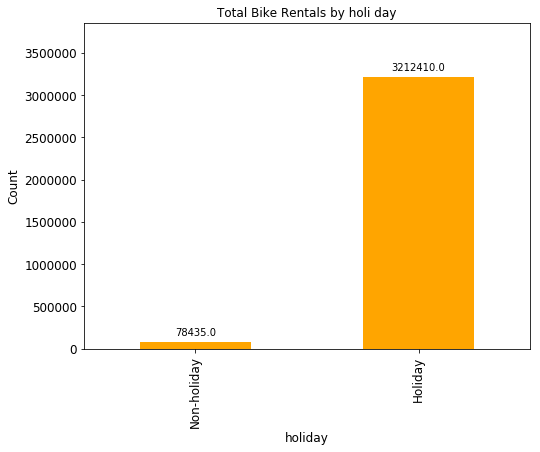

In [424]:
ax = data[['holiday','cnt']].groupby(['holiday']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by holi day", 
                                       color='orange', fontsize=12)
showLabels(ax)
ax.set_xlabel("holiday", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(['Non-holiday','Holiday'])
plt.show()

### It is observed that dataset is completely biased towards non-holiday

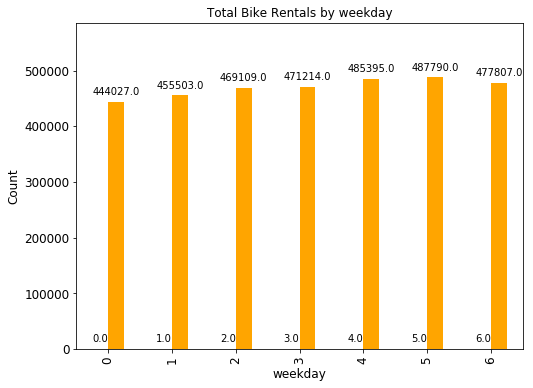

In [425]:
ax = data[['weekday','cnt']].groupby(['weekday']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by weekday", 
                                       color='orange', fontsize=12)
showLabels(ax)
ax.set_xlabel("weekday", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
# ax.set_xticklabels(['Non-holiday','Holiday'])
plt.show()

### It is observed that count is evenly distributed without much deviation throughout the weak days

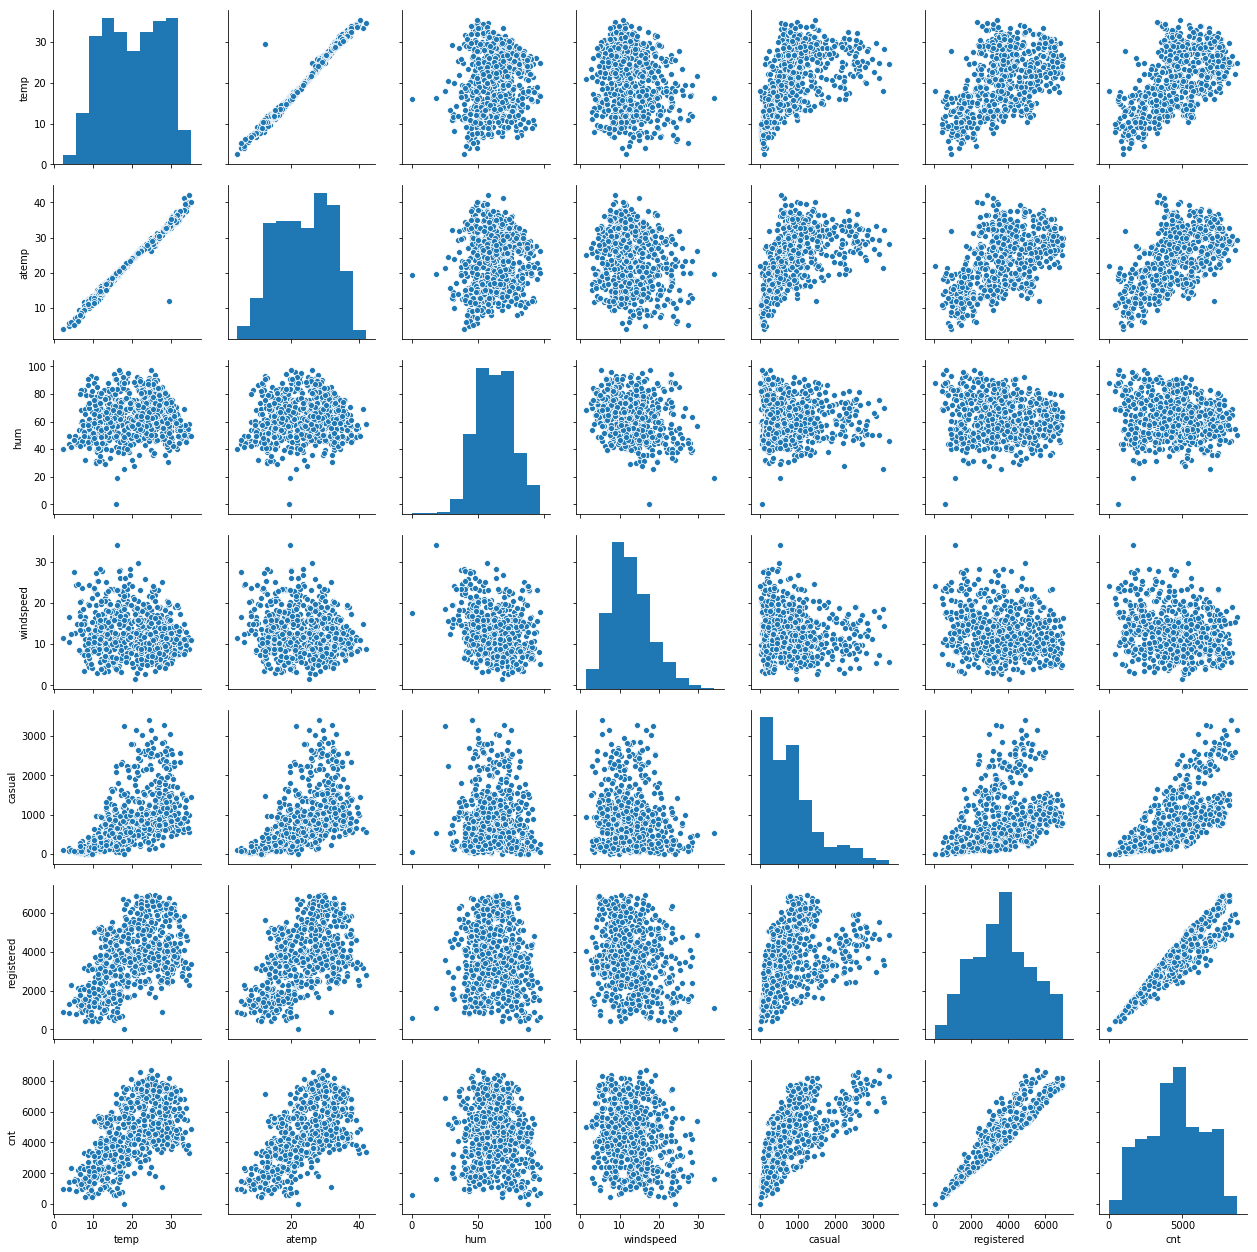

In [426]:
#Pair lot over numerical variables 
import seaborn as sns
sns.pairplot(data[['temp','atemp','hum','windspeed','casual','registered','cnt']])

### From the pair plot, it is observed that temp, atemp are highly correlated and registered, cnt are highly correlated to each other

In [427]:
### Let's findout the correlation between numerical variables

data.corr()

,instant,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,Day
instant,1.000000,0.498251,-0.000023,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896,0.122181
mnth,0.498251,1.000000,0.009523,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191,0.166910
weekday,-0.000023,0.009523,1.000000,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534,0.000190
temp,0.150738,0.219083,-0.000168,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,0.081898
atemp,0.152773,0.226430,-0.007539,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,0.078212
hum,0.016080,0.224937,-0.052290,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,0.096106
windspeed,-0.112667,-0.208013,0.014283,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,-0.027370
casual,0.275604,0.121208,0.059978,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,0.024244
registered,0.660544,0.291952,0.057427,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,0.040821
cnt,0.629896,0.278191,0.067534,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000,0.041484


In [428]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,instant,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt,Day
instant,1,0.498251,-2.26973e-05,0.150738,0.152773,0.0160797,-0.112667,0.275604,0.660544,0.629896,0.122181
mnth,0.498251,1,0.00952297,0.219083,0.22643,0.224937,-0.208013,0.121208,0.291952,0.278191,0.16691
weekday,-2.26973e-05,0.00952297,1,-0.000168496,-0.00753877,-0.0522898,0.0142826,0.0599783,0.0574274,0.0675341,0.000189625
temp,0.150738,0.219083,-0.000168496,1,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,0.0818982
atemp,0.152773,0.22643,-0.00753877,0.991696,1,0.141512,-0.183876,0.543362,0.543678,0.630685,0.078212
hum,0.0160797,0.224937,-0.0522898,0.128565,0.141512,1,-0.248506,-0.0752114,-0.0892119,-0.0985429,0.0961062
windspeed,-0.112667,-0.208013,0.0142826,-0.158186,-0.183876,-0.248506,1,-0.167995,-0.217914,-0.235132,-0.0273695
casual,0.275604,0.121208,0.0599783,0.542731,0.543362,-0.0752114,-0.167995,1,0.394137,0.672123,0.024244
registered,0.660544,0.291952,0.0574274,0.539436,0.543678,-0.0892119,-0.217914,0.394137,1,0.945411,0.0408209
cnt,0.629896,0.278191,0.0675341,0.627044,0.630685,-0.0985429,-0.235132,0.672123,0.945411,1,0.0414841


### It is observed that temp, atemp are highly correlated to each other, here, let's drop atemp feature along with other useless columns

### In a more general situation, when you have two independent variables that are very highly correlated, you definitely should remove one of them because you run into the multicollinearity conundrum and your regression model's regression coefficients related to the two highly correlated variables will be unreliable.

In [429]:
data[data.columns[1:]].corr()['cnt'][:]

mnth          0.278191
weekday       0.067534
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
Day           0.041484
Name: cnt, dtype: float64

### It is observed that registered is highly correlated with target variable, since cnt= casual+registered, we can drop them along with other redundant variables

In [430]:
data=data.drop(['atemp','casual','registered','dteday'],axis=1)

In [431]:
data.dropna(inplace=True)

In [432]:
data2 = data.copy()
# restoring the mappings of the required values in the dataset
data2['season'] =data2['season'].map({'Spring':1,'Summer':2,'Fall':3,'Winter':4})
data2['holiday'] = data2['holiday'].map({'Nholiday':0,'Holiday':1})
data2['workingday'] = data2['workingday'].map({'Off':0,'Workday':1})
data2['weathersit'] = data2['weathersit'].map({'Clear, Few clouds, Partly cloudy, Partly cloudy':1,'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist':2,'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds':3,'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog':4 })
data2['yr'] = data2['yr'].map({'2018':0,'2019':1})


### Dummification of categorical variables

In [433]:
### creating categorical encoded version of dataset using essential categorical variables
def data_model(raw_dataframe, target_columns, drop_first = False, make_na_col = True):
    
# dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, drop_first=drop_first,dummy_na=make_na_col)
    return (dataframe_dummy)

# make a copy for editing without affecting original
data3 = data2.copy()
data3=data3.sort_values('instant')

# dummifying  categorical columns
data3=data_model(data3,target_columns = ['season','weekday','weathersit'],drop_first = True)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
data3 = data3.dropna() 


In [436]:
y = data3['cnt']
X = data3.drop(['cnt'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

scl= StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

from sklearn import linear_model
lr_model = linear_model.LinearRegression()

#training model in training set
lr_model.fit(X_train_std, y_train)

# making predection using the test set
y_pred = lr_model.predict(X_test_std)

#root mean squared error
print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 794.85


In [437]:
print('r2_score:',r2_score(y_test,y_pred))

r2_score: 0.8297329829384814


### We've got r2 score as 0.82, which is a fair enough score for a good model

In [438]:
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# print coefficients as this is what our web application will use in the end
print('Coefficients: \n', model_lr.coef_)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))


Coefficients: 
 [-3.48533869e+00  3.24919935e+03  7.28821239e+01 -3.25600587e+02
  3.36811014e+02  1.22385147e+02 -9.86512721e+00 -3.75260714e+01
 -2.58395988e+00  1.28010558e+03  1.07883385e+03  1.89994050e+03
  2.27373675e-13 -7.00408071e+01 -1.28527574e+02  4.43645397e+01
  5.88893495e+01  1.06524919e+02  3.88982527e+02  0.00000000e+00
 -4.82547333e+02 -1.91377036e+03  0.00000000e+00]
Root Mean squared error: 794.85


In [439]:
# loop through each feature and calculate the R^2 score
features = ['yr','mnth','holiday','workingday','temp','hum','windspeed','Day']
from sklearn import linear_model
from sklearn.metrics import r2_score
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))

R^2 for yr is 0.379409
R^2 for mnth is 0.038149
R^2 for holiday is -0.010647
R^2 for workingday is -0.031766
R^2 for temp is 0.369972
R^2 for hum is 0.008029
R^2 for windspeed is 0.055073
R^2 for Day is -0.002783


### 37% of variance is explained by temp and 38% of variance is explained by yr 

In [440]:
# Let's extract our features with coefficients
# features with coefficients 
feature_coefficients  = pd.DataFrame({'coefficients':model_lr.coef_[0], 
                                    'features':X_train.columns.values})

feature_coefficients.sort_values('coefficients')

,coefficients,features
0,4.60753,instant
20,4.60753,weathersit_2.0
19,4.60753,weekday_nan
18,4.60753,weekday_6.0
17,4.60753,weekday_5.0
16,4.60753,weekday_4.0
15,4.60753,weekday_3.0
14,4.60753,weekday_2.0
13,4.60753,weekday_1.0
12,4.60753,season_nan


In [441]:
#  printing thre intercept of model
print('Intercept: %f' % model_lr.intercept_)

Intercept: 4481.710184


In [442]:
# extracting the mean values of coefficients
np.mean(X_train['temp'])

20.550309976712306

In [443]:
np.mean(X_train['Day'])

15.46183953033268

In [444]:
np.mean(X_train['windspeed'])

12.59800120215264

In [445]:
np.mean(X_train['hum'])

63.48214461839528

### The rental count for obtained parameters are defined by 

### rental_counts = INTERCEPT + (MEAN_HOLIDAY * COEF_HOLIDAY)+ (MEAN_SEASON_1 * COEF_SEASON_1)+(MEAN_SEASON_2 * COEF_SEASON_2)+ (MEAN_SEASON_3 * COEF_SEASON_3)  + (MEAN_SEASON_4 * COEF_SEASON_4)+(MEAN_TEMP * COEF_TEMP)
